In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import copy

# Import custom functions for plotting
import plots
import dimensions as dims

In [2]:
# Read subject data
experiment, full_experiment = plots.define_experiment()

subject1 = pd.read_csv("Subject_1.csv")
subject1 = pd.merge(subject1, full_experiment, on = "Trial")

subject2 = pd.read_csv("Subject_2.csv")
subject2 = pd.merge(subject2, full_experiment, on = "Trial")

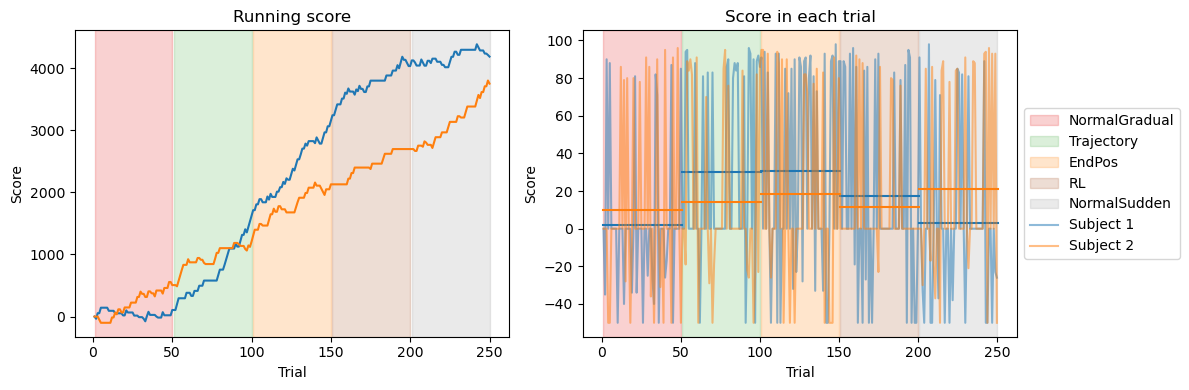

In [3]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
plots.plot_running_score(experiment, subjects = [subject1, subject2], ax = axs[0], show_legend = False)
plots.plot_trial_score(experiment, subjects = [subject1, subject2], ax = axs[1])
fig.tight_layout()

**Figure 1**. (Left) Running score throughout the experiment and (right) score in each trial throughout the experiment for subjects 1 and 2, highlighting the different experimental blocks. Subject 2 is continuously improving in performing the task, while the performance of subject 1 drops substantially in the last block of trials (even though the full movement of the pint is visible). Subject 1 noted during the experiment that it is easier to perform the task well when the full movement of the pint is not visible (thus, during the "Trajectory", "EndPos" and "RL" blocks). Subject 2 found the opposite to be true, saying that the trials in the "RL" block were the most challenging.

In [6]:
def plot_ellipse_around_points(x, y, ax, color, nstd = 2, **kwargs):
    cov = np.cov(x, y)
    pos = (np.mean(x), np.mean(y))

    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * nstd * np.sqrt(eigvals)
    
    ellipse = Ellipse(xy = pos, width = width, height = height, angle = angle, **kwargs)
    
    ax.scatter(pos[0], pos[1], marker = "x", color = color)
    ax.add_patch(ellipse)

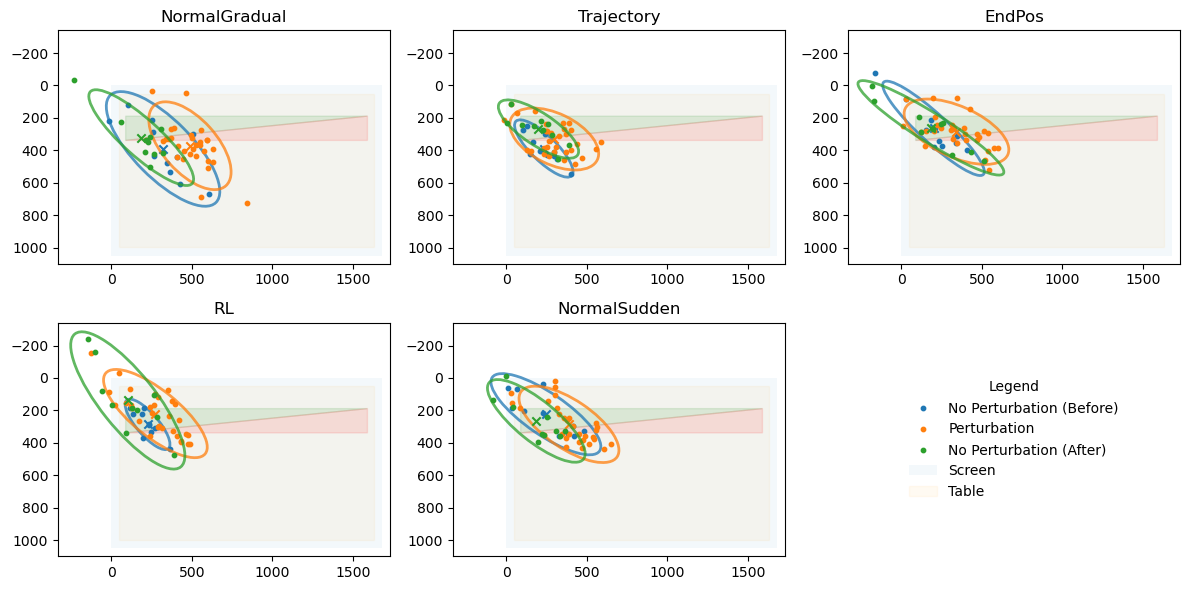

In [7]:
default_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

min_pos_x = subject1.EndPosX.min() - 100
max_pos_x = dims.screen_width + 50

min_pos_y = subject1.EndPosY.min() - 100
max_pos_y = dims.screen_height + 50

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 6))

legend_handles = []

for (i, feedback), ax in zip(enumerate(subject1.Type.unique()), axs.flatten()[:-1]):  # Exclude the last subplot
    screen_ = copy.deepcopy(dims.screen)
    table_ = copy.deepcopy(dims.table)

    ax.add_patch(screen_)
    ax.add_patch(table_)
    ax.fill(dims.green_x, dims.green_y, color = "green", alpha = 0.1)
    ax.fill(dims.red_x, dims.red_y, color = "red", alpha = 0.1)

    group_data = subject1[subject1.Type == feedback].reset_index(drop = True).sort_values(by = "Trial")
    no_perturb_before = group_data.loc[:10]
    perturb = group_data.loc[10:40]
    no_perturb_after = group_data.loc[40:]

    scatter_before = ax.scatter(
        no_perturb_before.EndPosX,
        no_perturb_before.EndPosY,
        label = "No Perturbation (Before)",
        c = default_colors[0],
        s = 10
    )
    plot_ellipse_around_points(
        no_perturb_before.EndPosX, no_perturb_before.EndPosY,
        ax = ax,
        color = default_colors[0],
        alpha = 0.75,
        edgecolor = default_colors[0],
        facecolor = "none",
        lw = 2
    )
    
    scatter_perturb = ax.scatter(
        perturb.EndPosX,
        perturb.EndPosY,
        label = "Perturbation",
        c = default_colors[1],
        s = 10
    )
    plot_ellipse_around_points(
        perturb.EndPosX, perturb.EndPosY,
        ax = ax,
        color = default_colors[1],
        alpha = 0.75,
        edgecolor = default_colors[1],
        facecolor = "none",
        lw = 2
    )
    
    scatter_after = ax.scatter(
        no_perturb_after.EndPosX,
        no_perturb_after.EndPosY,
        label = "No Perturbation (After)",
        c = default_colors[2],
        s = 10
    )
    plot_ellipse_around_points(
        no_perturb_after.EndPosX, no_perturb_after.EndPosY,
        ax = ax,
        color = default_colors[2],
        alpha = 0.75,
        edgecolor = default_colors[2],
        facecolor = "none",
        lw = 2
    )

    ax.set_xlim(min_pos_x, max_pos_x)
    ax.set_ylim(min_pos_y, max_pos_y)

    ax.set_title(feedback)
    ax.invert_yaxis()

    if i == 0:
        legend_handles.extend([scatter_before, scatter_perturb, scatter_after, screen_, table_])

# Hide the 6th subplot and use it for the legend
axs[1, 2].axis("off")
axs[1, 2].legend(handles = legend_handles, loc = "center", frameon = False, title = "Legend")

fig.tight_layout()

plt.show()

**Figure**. 

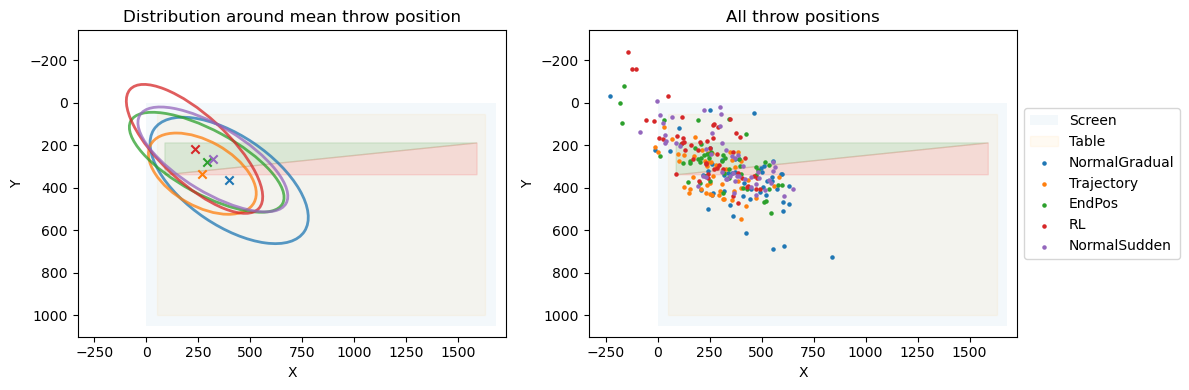

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

axs[0].add_patch(copy.deepcopy(dims.screen))
axs[1].add_patch(copy.deepcopy(dims.screen))

axs[0].add_patch(copy.deepcopy(dims.table))
axs[1].add_patch(copy.deepcopy(dims.table))

axs[0].fill(dims.green_x, dims.green_y, color = "green", alpha = 0.1)
axs[1].fill(dims.green_x, dims.green_y, color = "green", alpha = 0.1)

axs[0].fill(dims.red_x, dims.red_y, color = "red", alpha = 0.1)
axs[1].fill(dims.red_x, dims.red_y, color = "red", alpha = 0.1)

for i, feedback in enumerate(subject1.Type.unique()):
    group_data = subject1[subject1.Type == feedback]
    plot_ellipse_around_points(
        group_data.EndPosX, group_data.EndPosY,
        ax = axs[0],
        color = default_colors[i],
        alpha = 0.75,
        edgecolor = default_colors[i],
        facecolor = "none",
        lw = 2,
        label = feedback
    )

for i, feedback in enumerate(subject1.Type.unique()):
    group_data = subject1[subject1.Type == feedback]
    axs[1].scatter(
        group_data.EndPosX,
        group_data.EndPosY,
        color = default_colors[i],
        s = 5,
        label = feedback
    )

axs[0].set_xlim(min_pos_x, max_pos_x)
axs[0].set_ylim(min_pos_y, max_pos_y)

axs[1].set_xlim(min_pos_x, max_pos_x)
axs[1].set_ylim(min_pos_y, max_pos_y)

axs[0].invert_yaxis()
axs[1].invert_yaxis()

axs[1].legend(loc = "center left", bbox_to_anchor = (1, 0.5))

axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")

axs[0].set_title("Distribution around mean throw position")
axs[1].set_title("All throw positions")

fig.tight_layout()
plt.show()